# Atividade 1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
relatorio_vendas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv')
relatorio_vendas

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [17]:
# Paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [ ]:
relatorio_vendas['data_pedido'] = pd.to_datetime(relatorio_vendas['data_pedido'], format = '%Y-%m-%d')

In [ ]:
# Datafram com as colunas
df_lucro_ano = relatorio_vendas.copy()
df_lucro_ano = df_lucro_ano[['data_pedido', 'lucro']]

In [ ]:
# Colunas com anos e pedidos
df_lucro_ano['ano'] = df_lucro_ano.data_pedido.dt.year
df_lucro_ano.drop(labels = 'data_pedido', axis = 1, inplace = True)

In [ ]:
df_lucro_ano = df_lucro_ano.groupby(['ano']).aggregate('sum')
df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


/tmp/ipython-input-3313395287.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y = 'lucro', palette = cores)


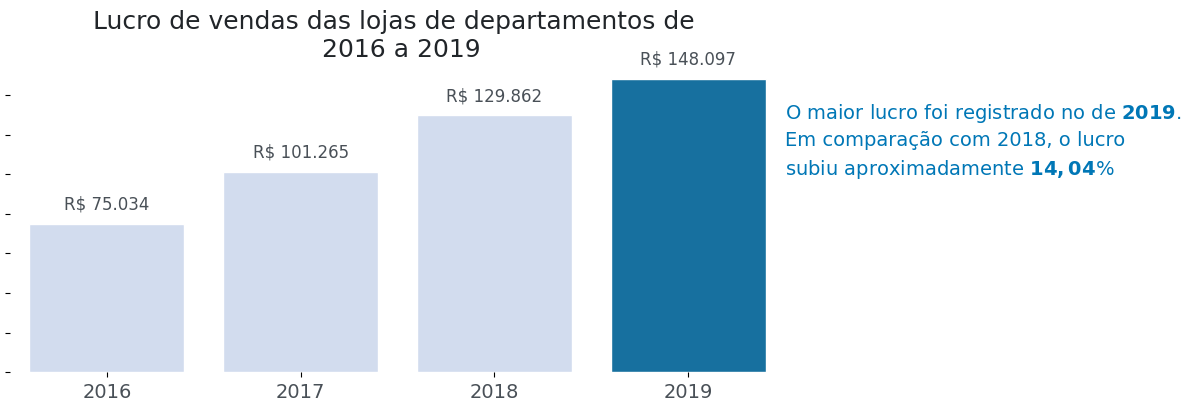

In [ ]:
# Gerando gráfico

fig, ax = plt.subplots(figsize = (10, 4))
sns.set_theme(style = 'white')

# Cores do gráfico
cores = []
for ano in df_lucro_ano.index:
  if df_lucro_ano.loc[ano, 'lucro'] == df_lucro_ano['lucro'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

# Criando gráfico de colunas
ax = sns.barplot(data = df_lucro_ano, x = df_lucro_ano.index, y = 'lucro', palette = cores)

# Personalização dos gráficos
ax.set_title('Lucro de vendas das lojas de departamentos de \n 2016 a 2019', loc = 'center', fontsize = 18, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Valores nas barras
ax.set_yticklabels([])
for i, valor in enumerate(df_lucro_ano['lucro']):
  qtd = f'R$ {valor:,.0f}'.replace(',','.')
  offset = 1e4
  ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 12, ha = 'center', va = 'center')


# Anotação
ax.text(3.5, 1e5,
        'O maior lucro foi registrado no de $\\bf{2019}$.\n'
        'Em comparação com 2018, o lucro\n'
        'subiu aproximadamente $\\bf{14,04}$%',
        fontsize = 14, linespacing = 1.45, color= AZUL2)

plt.show()

Desafio 2: Para o segundo desafio vamos criar um gráfico de barras de vendas por departamento no período de 2016 a 2019 em ordem decrescente e adicionar um texto falando dos 3 departamentos que mais lucraram.

In [ ]:
fat_produto = relatorio_vendas.copy()
fat_produto = fat_produto[['tipo_produto', 'vendas']]

In [ ]:
# Agrupando dados
fat_produto = fat_produto.groupby(['tipo_produto']).agg('sum').sort_values('vendas', ascending = False)
top_10 = fat_produto[:10]
top_10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [ ]:
# texto colorido do qual eu não entendo nada :(

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp = 20, ax = None, **kw):
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color = cor, transform = t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x = ex.width, units = 'dots')

    t = transforms.offset_copy(ax.transData, x = 0, y = (i + 1) * esp, units = 'dots')

<>:29: SyntaxWarning: invalid escape sequence '\ '
<>:29: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-228541090.py:29: SyntaxWarning: invalid escape sequence '\ '
  'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
/tmp/ipython-input-228541090.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10, x = 'vendas', y = top_10.index, palette = cores)


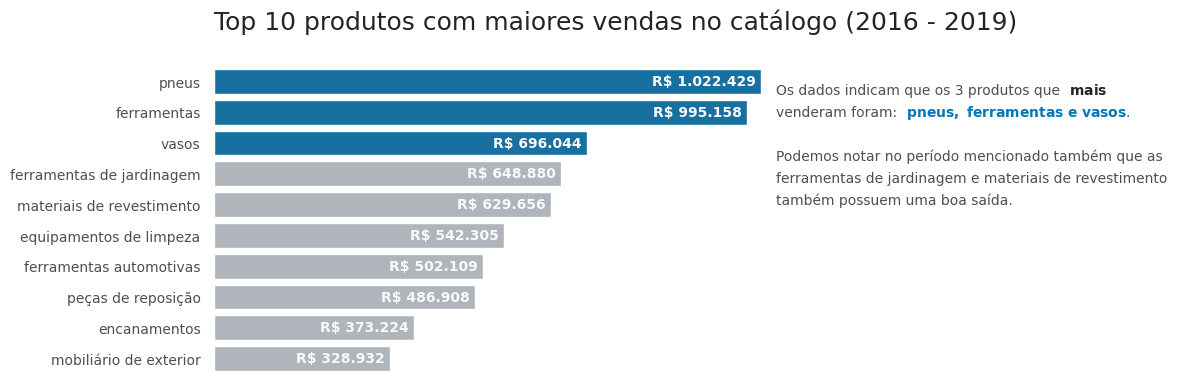

In [ ]:
# Gerando gráfico
fig, ax = plt.subplots(figsize = (10, 4))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style = 'white')

# Definindo as cores
cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)]

# Gráfico de barras
ax = sns.barplot(data = top_10, x = 'vendas', y = top_10.index, palette = cores)

ax.set_title('Top 10 produtos com maiores vendas no catálogo (2016 - 2019)\n', fontsize= 18, color = CINZA1, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
sns.despine(left = True, bottom = True)

# Valores nas barras
for i, valor in enumerate(top_10['vendas']):
  qtd = f'R$ {valor:,.0f}'.replace(',', '.')
  offset = 1e4
  ax.text(valor - offset, i, qtd, color = CINZA5, fontsize = 10, fontweight = 'bold', ha = 'right', va = 'center')

# Vou só copiar essa parte do texto
texto_colorido(
    1.05e6, 4,                                                      # coordenadas
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

plt.show()

# Atividade 2

Desafio 1: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

In [ ]:
import pandas as pd

#importando os dados
vendas = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv')
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format = '%Y-%m-%d')

# criando o df com as colunas selecionadas
vendas_co = vendas.copy()
vendas_co = vendas_co[['data_pedido', 'regiao', 'estado', 'vendas']]

#gerando a coluna e definindo por ano
vendas_co['ano'] = vendas_co.data_pedido.dt.year

# fazendo a pesquisa da região e do ano / apagando as colunas que não vamos mais usar
vendas_co = vendas_co.query('regiao == "Centro-Oeste" and (ano == 2017 or ano == 2018)')
vendas_co.drop(labels = ['data_pedido', 'regiao'], axis = 1, inplace = True)

vendas_co

,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [ ]:
# tabela cruzada

vendas_co_ano = pd.crosstab(index = vendas_co.ano, columns = vendas_co.estado, values = vendas_co.vendas, aggfunc = 'sum')
vendas_co_ano

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


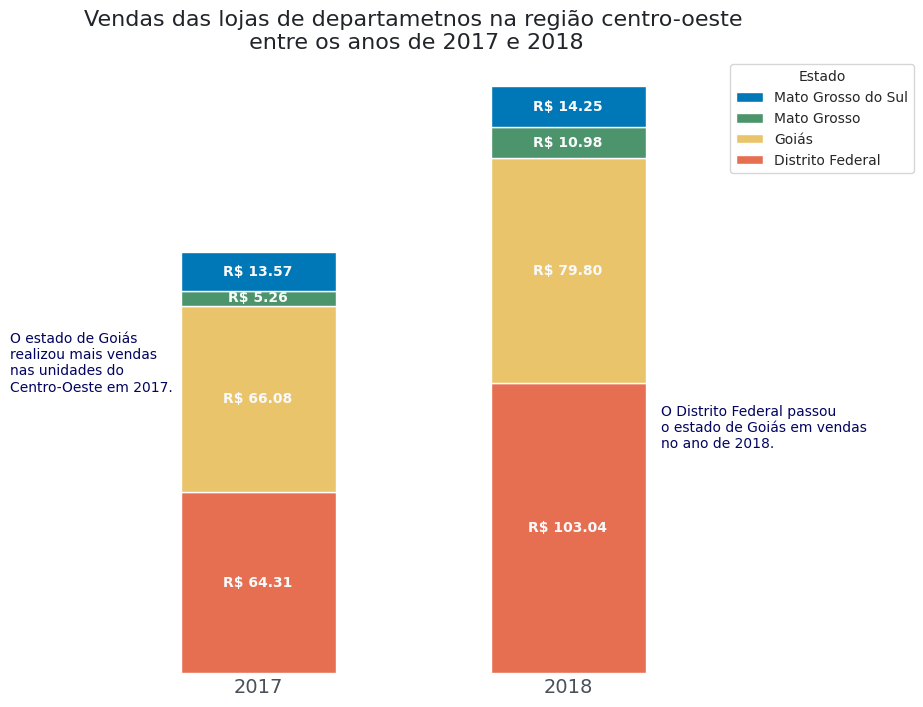

In [ ]:
# cores

cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

# Gráfico
ax = vendas_co_ano.plot(kind = 'bar', stacked = True, figsize = (8,8), color = cores)

ax.set_title('Vendas das lojas de departametnos na região centro-oeste\n entre os anos de 2017 e 2018',
             fontsize = 16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize = 14, labelcolor = CINZA2, rotation = 0)
ax.set_frame_on(False)

ax.tick_params(axis = 'both', which = 'both', length = 0)

ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

# legenda
ax.legend(bbox_to_anchor = (1,1), reverse = True, title = 'Estado', title_fontsize = 10, fontsize = 10)

# Adicionando valores
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f}'.replace(',', '.') for valor in container]
  ax.bar_label(container, label_type = 'center', labels = labels, size = 10, color = CINZA5, fontweight = 'bold')

fig = ax.get_figure()

Desafio 2: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [ ]:
df_depart = vendas.copy()
df_depart = df_depart[['departamento', 'modo_envio']]

df_depart = pd.crosstab(index = df_depart.departamento, columns = df_depart.modo_envio, normalize = 'index')
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [ ]:
# texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp = 20, ax = None, **kw):
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color = cor, transform = t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x = ex.width, units = 'dots')

    t = transforms.offset_copy(ax.transData, x = 0, y = (i + 1) * esp, units = 'dots')

<>:19: SyntaxWarning: invalid escape sequence '\ '
<>:19: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-679010663.py:19: SyntaxWarning: invalid escape sequence '\ '
  texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)


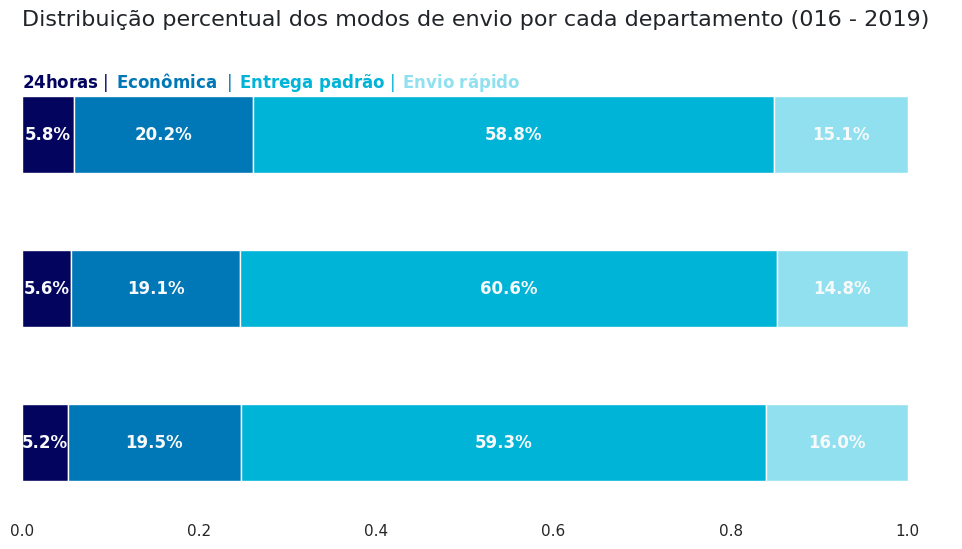

In [ ]:
# gráfico

cores = [AZUL1, AZUL2, AZUL3, AZUL4]

# barras empilhadas
ax =df_depart.plot(kind = 'barh', stacked = True, figsize = (12,6), color = cores, legend = None)
ax.set_title('Distribuição percentual dos modos de envio por cada departamento (016 - 2019)\n',
             fontsize = 16, loc = 'left', color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.yaxis.set_tick_params(labelsize = 12, color = CINZA2)
ax.set_frame_on(False)

# removendo ticks
ax.tick_params(axis = 'both', which = 'both', length = 0)

#legenda
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

# valores
for container in ax.containers:
  labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
  ax.bar_label(container, label_type = 'center', labels = labels, size = 12, color = CINZA5, fontweight = 'bold')

fig = ax.get_figure()

# Atividade 3

Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

In [ ]:

vendas = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/master/dados/relatorio_vendas.csv")
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

import matplotlib.dates as mdates

df_estado = vendas.copy()
df_estado = df_estado.query('estado == "Bahia"')[['data_pedido', 'vendas']]

# Agrupando por final de semestre
df_estado.set_index('data_pedido', inplace = True)
df_estado = df_estado.resample('2Q', closed = 'left').agg('sum')
df_estado = df_estado.reset_index()
df_estado.head()

/tmp/ipython-input-702957081.py:11: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_estado = df_estado.resample('2Q', closed = 'left').agg('sum')


,data_pedido,vendas
0,2016-06-30,48100.19
1,2016-12-31,84362.51
2,2017-06-30,25747.57
3,2017-12-31,43287.77
4,2018-06-30,47121.96


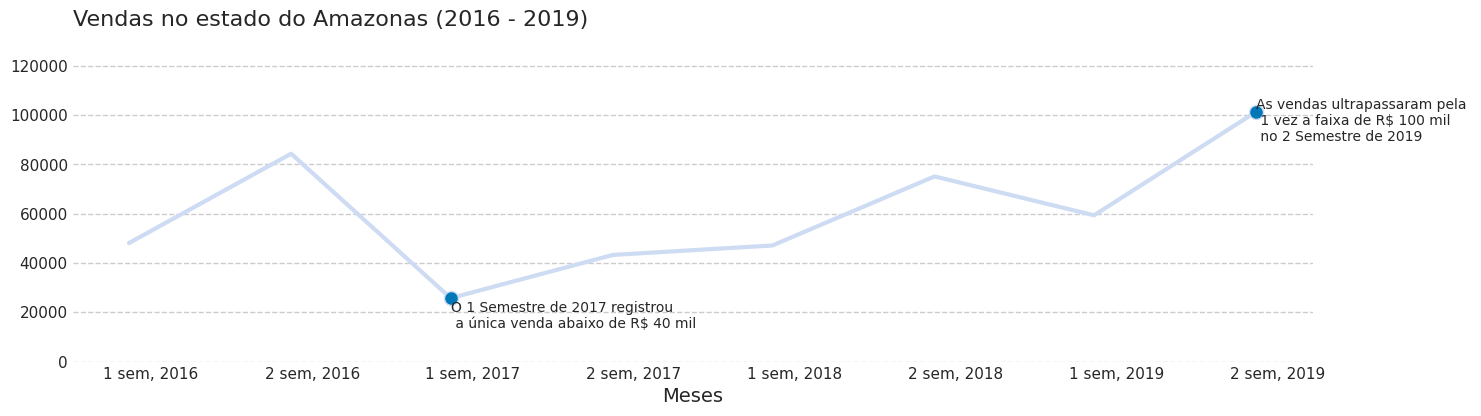

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize = (16, 4))

venda_min = df_estado.vendas.min()
venda_max = df_estado.vendas.max()
valores = df_estado.vendas.values

# lista com pontos a marcar
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# gráfico de linhas
ax.plot(df_estado['data_pedido'], df_estado['vendas'], lw = 3, color = AZUL5, marker = 'o', markersize = 10,
        markerfacecolor = AZUL2, markevery = pontos_a_marcar)

# personalização
ax.set_title('Vendas no estado do Amazonas (2016 - 2019)', fontsize = 16, loc = 'left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = 'y', linestyle = '--')
ax.set_frame_on(False)

ax.tick_params(axis = 'both', which = 'both', length = 0)

#limite mínimo e máximo
plt.ylim(0, 1.25e5)

# Intervalo semestral
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ['1 sem, 2016', '2 sem, 2016', '1 sem, 2017', '2 sem, 2017', '1 sem, 2018', '2 sem, 2018', '1 sem, 2019', '2 sem, 2019']
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = 'left')

# ponto de destaque
for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == venda_min:
    ax.text(x, y = y - 1.2e4, s = f'O 1 Semestre de 2017 registrou \n a única venda abaixo de R$ 40 mil', fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y - 1.2e4, s = f'As vendas ultrapassaram pela \n 1 vez a faixa de R$ 100 mil \n no 2 Semestre de 2019', fontsize = 10)

plt.show()

Desafio 2: Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

In [ ]:
df_ne = vendas.copy()
df_ne = df_ne.query('regiao == "Nordeste"')[['estado', 'data_pedido', 'lucro']]
df_ne

,estado,data_pedido,lucro
13,Ceará,2018-12-06,225.39
17,Bahia,2016-08-28,4.22
18,Bahia,2016-08-28,27.21
19,Bahia,2016-08-28,12.56
20,Bahia,2018-12-10,8.61
...,...,...,...
8934,Rio Grande do Norte,2017-05-18,27.40
8936,Bahia,2019-11-18,48.96
8937,Bahia,2019-11-18,94.60
8938,Paraíba,2016-01-22,6.96


In [ ]:
# tabela cruzada
df_estados_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc = 'sum')

# lucro por ano (groupby)
df_estados_ne = df_estados_ne.resample('Y').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne

/tmp/ipython-input-4130424091.py:13: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_estados_ne = df_estados_ne.resample('Y').agg('sum')


estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [ ]:
# Gráfico
import plotly.express as px

fig = px.line(df_estados_ne, x = df_estados_ne.index, y = df_estados_ne.columns, markers = True, labels = {'estado': 'Estados'},
              color_discrete_sequence = [AZUL2, VERMELHO1, AMARELO1, VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajuste de layout
fig.update_layout(width = 1300, height = 600, font_family = 'DejaVu Sans', font_size = 15, font_color = CINZA2, title_font_color = CINZA1, title_font_size = 24,
                  title_text = 'Lucros das lojas de departamentos por ano na Região Nordeste' + '<br><sup size = 1 style = "color:#555655">de 2016 a 2019</sup>',
                  xaxis_title = '', yaxis_title = '', plot_bgcolor = CINZA5)

# ticks y para milhar
fig.update_yaxes(tickprefix = 'R$ ', ticksuffix = ' mil   ')

# eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals = df_estados_ne.index)

#hover
fig.update_traces(mode = 'markers+lines', hovertemplate = '<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}')

fig.show()


# Atividade 4

Desafio 1: Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse
import seaborn as sns

In [ ]:
# Paleta de cores

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [ ]:
dados = pd.read_csv('pop_idade.csv')
dados.head()

,idade
0,39
1,33
2,41
3,50
4,32


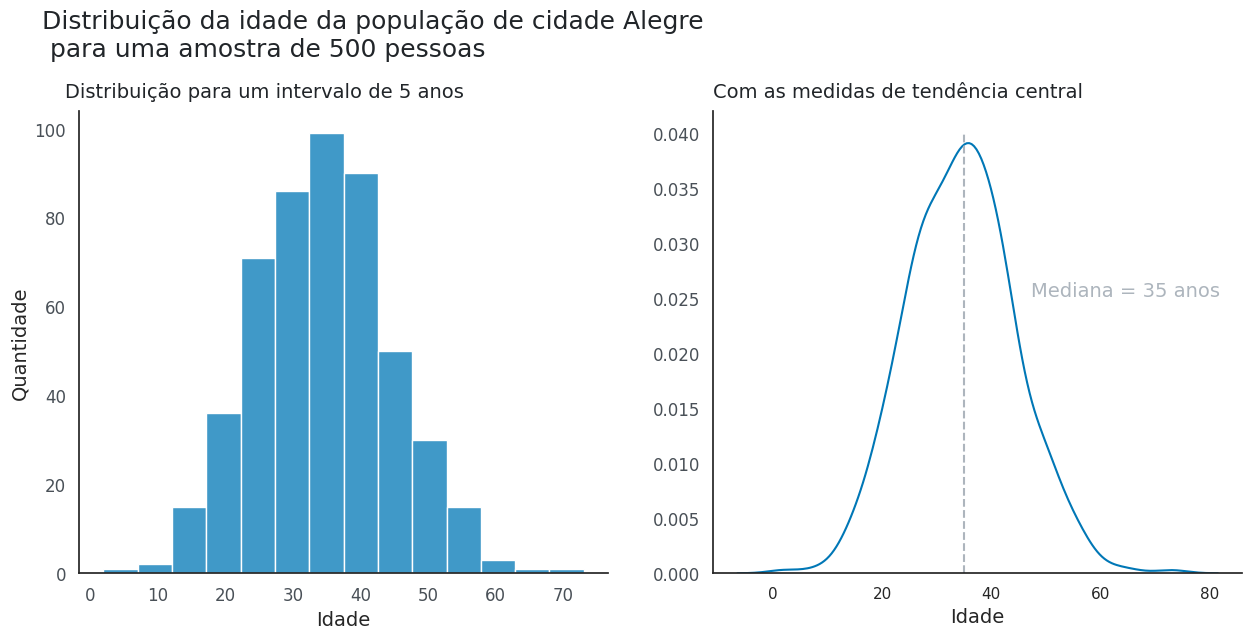

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (15,6))
sns.set_theme(style = 'white')

fig.suptitle('Distribuição da idade da população de cidade Alegre\n para uma amostra de 500 pessoas',
             fontsize = 18, color =  CINZA1, x = 0.1, y = 1.05, ha = 'left')

# histograma
sns.histplot(ax = axs[0], data = dados, x = 'idade', binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size = 14, color = CINZA1, x = 0.35, pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
sns.despine()

# histograma de linhas

sns.kdeplot(ax = axs[1], data = dados, x = 'idade', color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size = 14, color =CINZA1, x = 0.35, pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
axs[1].set_yticklabels = ([])
sns.despine()

# linha da mediana
axs[1].vlines(x = dados.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = '--')
axs[1].text(0.6, 0.6, f'Mediana = {int(dados.idade.median())} anos', fontsize = 14, color = CINZA3, transform = axs[1].transAxes)

plt.show()

Desafio 2: Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

In [ ]:
vol_amaciante = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/volume_amaciante.csv")

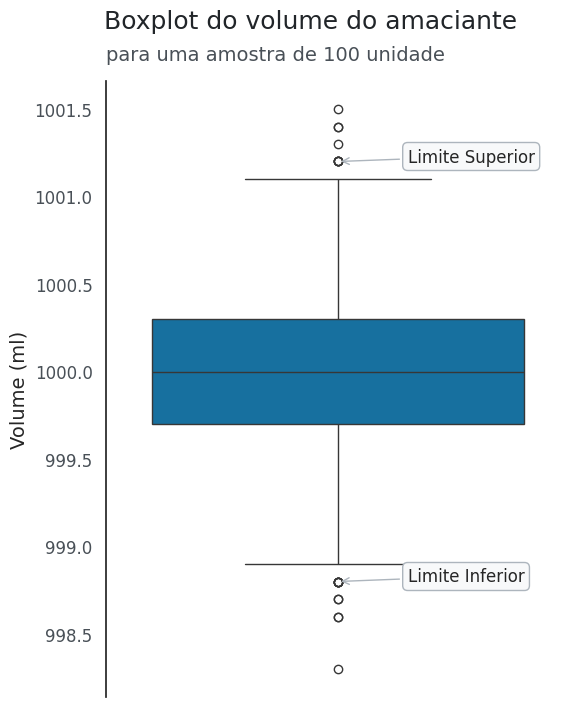

In [ ]:
fig, ax = plt.subplots(figsize = (6,8))
sns.set_theme(style = 'white')

#boxplot
ax = sns.boxplot(data = vol_amaciante, y = 'Volume', orient = 'v', color = AZUL2)

#PERSONALIZAÇÃO
plt.suptitle('Boxplot do volume do amaciante', size = 18, color = CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 100 unidade', fontsize = 14, color = CINZA2, pad = 15, loc = 'left')
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = CINZA2)
sns.despine(bottom = True)

# Calculando intervalos
IIQ = vol_amaciante['Volume'].quantile(0.75) - vol_amaciante['Volume'].quantile(0.25)
limite_superior = vol_amaciante['Volume'].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante['Volume'].quantile(0.25) - 1.5 * IIQ

# Anotação
ax.annotate('Limite Superior', xy = (0, limite_superior), xycoords = 'data',
            bbox = dict(boxstyle = 'round', fc = CINZA5, ec = CINZA3),
            xytext = (50, 0), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->', color = CINZA3))

ax.annotate('Limite Inferior', xy = (0, limite_inferior), xycoords = 'data',
            bbox = dict(boxstyle = 'round', fc = CINZA5, ec = CINZA3),
            xytext = (50, 0), textcoords = 'offset points',
            arrowprops = dict(arrowstyle = '->', color = CINZA3))
plt.show()


# Atividade 5

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Paleta de cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

In [2]:
notas = pd.read_csv('notas.csv')
notas

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72
...,...,...
295,Turma 3,65
296,Turma 3,75
297,Turma 3,71
298,Turma 3,74


<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:24: SyntaxWarning: invalid escape sequence '\ '
<>:26: SyntaxWarning: invalid escape sequence '\ '
<>:21: SyntaxWarning: invalid escape sequence '\ '
<>:22: SyntaxWarning: invalid escape sequence '\ '
<>:24: SyntaxWarning: invalid escape sequence '\ '
<>:26: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1698247345.py:21: SyntaxWarning: invalid escape sequence '\ '
  'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
/tmp/ipython-input-1698247345.py:22: SyntaxWarning: invalid escape sequence '\ '
  'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
/tmp/ipython-input-1698247345.py:24: SyntaxWarning: invalid escape sequence '\ '
  ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
/tmp/ipython-input-1698247345.py:26: SyntaxWarning: invalid escape sequence '\ '
  'Enquanto isso,

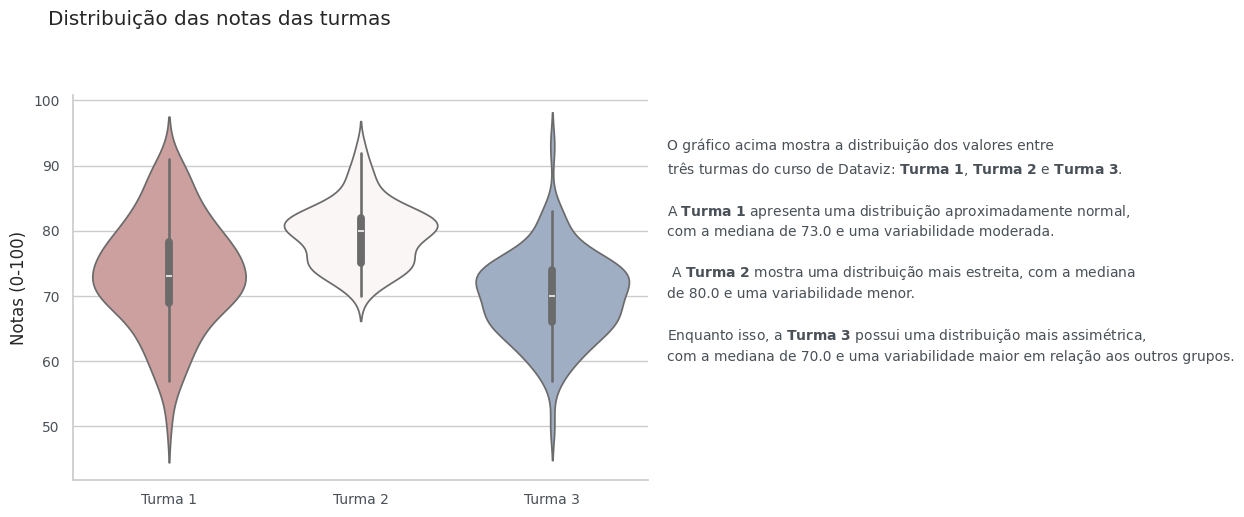

In [5]:
# área do gráfico
fig, ax  = plt.subplots(figsize = (10, 5))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style = 'whitegrid')

ax = sns.violinplot(data = notas, x = 'Turma', y = 'Nota', palette = 'vlag_r')

plt.suptitle('Distribuição das notas das turmas', ha = 'left', x = 0.1, y = 1.05)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)')
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
sns.despine()

mediana = []
for i in range(1, 4):
  mediana.append(notas.query(f'Turma == "Turma {i}"').Nota.median())

ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()

Desafio 2: Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.

In [7]:
df_medidas = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos/master/dados/medidas_sabao_em_po.csv")
df_b = df_medidas.query('amostra == "B"')[['comprimento', 'largura']]
df_b.head()

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


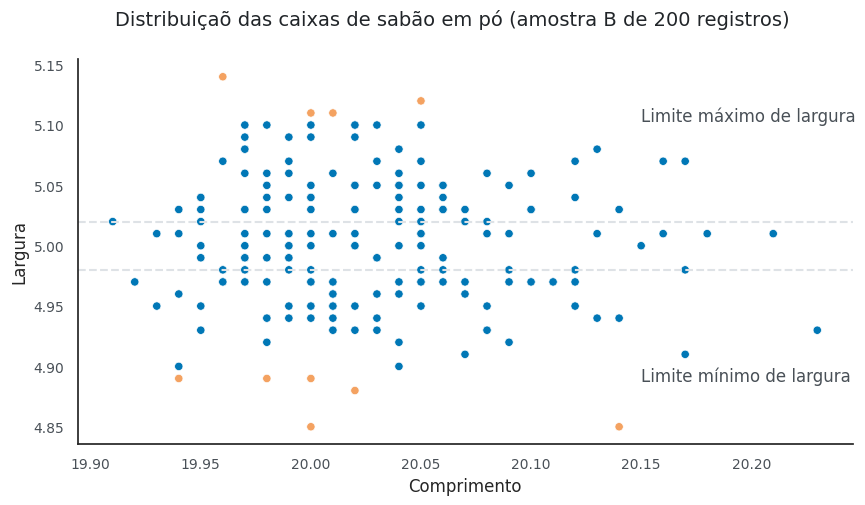

In [23]:
# gráfico

fig, ax = plt.subplots(figsize = (10, 5))
sns.set_theme(style = 'white')

cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

rejeita_comp = [True if (c > 20 * (1 + pct) or c < 20 * (1 - pct)) else False for c in df_b['comprimento']]
rejeita_larg = [True if (a > 5 * (1 + pct) or a < 5 * (1 - pct)) else False for a in df_b['largura']]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# gráfico de dispersão
ax = sns.scatterplot(data = df_b, x = 'comprimento', y = 'largura', color = map_cores)

# personalizando
plt.suptitle('Distribuiçaõ das caixas de sabão em pó (amostra B de 200 registros)', size = 14, color = CINZA1)
ax.set_xlabel('Comprimento')
ax.set_ylabel('Largura')
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
sns.despine()

#linhas

ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize = 12, color = CINZA2, ha = 'left', va = 'bottom')
plt.axhline(y = 5 * 1 + pct, color = CINZA4, linestyle = '--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize = 12, color = CINZA2, ha = 'left', va = 'top')
plt.axhline(y = 5 * 1 - pct, color = CINZA4, linestyle = '--')

plt.show()